In [1]:
# Week 1: data collection
# This notebook downloads daily market data for the S&P 500 (SPX) and VIX,  

In [2]:
#core libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pathlib import Path

DATA_DIR = Path("..").resolve() / "data"
DATA_DIR.mkdir(exist_ok=True)

In [3]:
# Download S&P and VIX prices using yahoo finance API starting from 2000
tickers = ["^GSPC", "^VIX"] #S&P 500, VIX
df = yf.download(tickers, start="2000-01-01", auto_adjust=False, progress=False)
df.head()

Price         Adj Close                   Close                    High  \
Ticker            ^GSPC       ^VIX        ^GSPC       ^VIX        ^GSPC   
Date                                                                      
2000-01-03  1455.219971  24.209999  1455.219971  24.209999  1478.000000   
2000-01-04  1399.420044  27.010000  1399.420044  27.010000  1455.219971   
2000-01-05  1402.109985  26.410000  1402.109985  26.410000  1413.270020   
2000-01-06  1403.449951  25.730000  1403.449951  25.730000  1411.900024   
2000-01-07  1441.469971  21.719999  1441.469971  21.719999  1441.469971   

Price                          Low                    Open             \
Ticker           ^VIX        ^GSPC       ^VIX        ^GSPC       ^VIX   
Date                                                                    
2000-01-03  26.150000  1438.359985  23.980000  1469.250000  24.360001   
2000-01-04  27.180000  1397.430054  24.799999  1455.219971  24.940001   
2000-01-05  29.000000  1377.680054  25.850000  1399.420044  27.980000   
2000-01-06  26.709999  1392.099976  24.700001  1402.109985  26.680000   
2000-01-07  25.170000  1400.729980  21.719999  1403.449951  25.139999   

Price           Volume       
Ticker           ^GSPC ^VIX  
Date                         
2000-01-03   931800000    0  
2000-01-04  1009000000    0  
2000-01-05  1085500000    0  
2000-01-06  1092300000    0  
2000-01-07  1225200000    0

In [4]:
px = df["Adj Close"].copy()
px = px.dropna().rename(columns={"^GSPC":"SPX", "^VIX":"VIX"})
px.tail()

Ticker,SPX,VIX
Date,,
2025-10-06,6740.279785,16.370001
2025-10-07,6714.589844,17.240000
2025-10-08,6753.720215,16.299999
2025-10-09,6735.109863,16.430000
2025-10-10,6552.509766,21.660000


In [5]:
px["SPX_RET"] = np.log(px["SPX"] / px["SPX"].shift(1))
rets = px[["SPX_RET"]].dropna()
rets.head()

Ticker,SPX_RET
Date,
2000-01-04,-0.039099
2000-01-05,0.001920
2000-01-06,0.000955
2000-01-07,0.026730
2000-01-10,0.011128


In [6]:
rets.to_csv(DATA_DIR / "spx_returns.csv", index=True)
print("Saved:", DATA_DIR / "spx_returns.csv")

Saved: /Users/inciozdemir/tail-risk-forecasting/data/spx_returns.csv


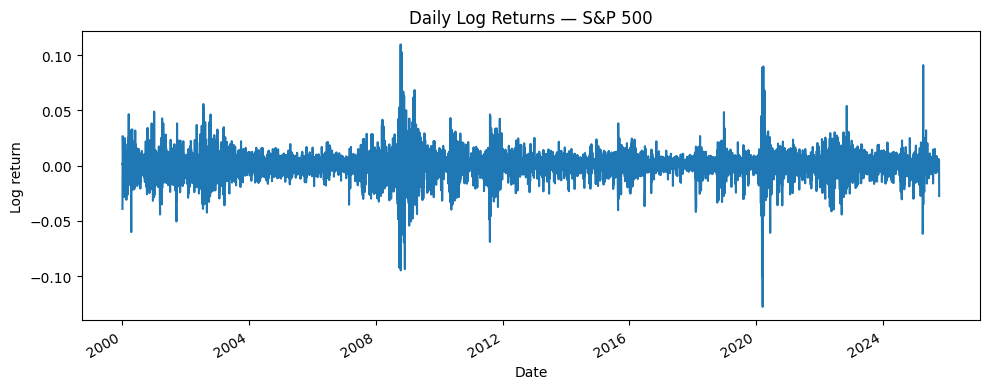

In [7]:
plt.figure(figsize=(10,4))
rets["SPX_RET"].plot()
plt.title("Daily Log Returns — S&P 500")
plt.xlabel("Date"); plt.ylabel("Log return")
plt.tight_layout(); plt.show()